In [16]:
# 1. Install Seaborn library
!pip install seaborn


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - ---------------

In [17]:
# 2. Import necessary libraries for confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
#  2]VGG 16 MODEL
# 1. Import necessary libraries
import os
import random
from shutil import copy2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# 2. Specify paths to your dataset and output folder
dataset_path = r"C:\Users\HP\OneDrive\Desktop\Dataset1"
output_path = r"C:\Users\HP\OneDrive\Desktop\Output_folder"


In [25]:
# 3. Define split counts
split_counts = {
    "train": {"yes_tumor": 4566, "no_tumor": 2450},
    "test": {"yes_tumor": 978, "no_tumor": 525},
    "valid": {"yes_tumor": 978, "no_tumor": 525},
}


In [26]:
# 4. Function to create output folders
def create_folders(output_path, split_names, class_names):
    for split in split_names:
        for class_name in class_names:
            os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

create_folders(output_path, ["train", "test", "valid"], ["Yes_Tumor", "No_Tumor"])


In [27]:
# 5. Function to split the dataset into train, test, and validation sets
def split_dataset(dataset_path, output_path, split_counts):
    for class_name in ["Yes_Tumor", "No_Tumor"]:
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        start_idx = 0
        for split, counts in split_counts.items():
            count = counts[class_name.lower()]
            split_path = os.path.join(output_path, split, class_name)
            for img in images[start_idx : start_idx + count]:
                copy2(os.path.join(class_path, img), os.path.join(split_path, img))
            start_idx += count

split_dataset(dataset_path, output_path, split_counts)


In [28]:
# 6. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [29]:
# 7. Create data generators (ensure class_mode='binary')
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_path, "train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "valid"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "test"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8606 images belonging to 2 classes.
Found 1124 images belonging to 2 classes.
Found 2758 images belonging to 2 classes.


In [30]:
# 8. Build and compile the model using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 221s 4us/step


In [31]:
# 9. Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
269/269 [==============================] - 775s 3s/step - loss: 0.4159 - accuracy: 0.8298 - val_loss: 0.3054 - val_accuracy: 0.8915
Epoch 2/10
269/269 [==============================] - 896s 3s/step - loss: 0.2862 - accuracy: 0.8783 - val_loss: 0.3474 - val_accuracy: 0.8479
Epoch 3/10
269/269 [==============================] - 844s 3s/step - loss: 0.2545 - accuracy: 0.8934 - val_loss: 0.2333 - val_accuracy: 0.9066
Epoch 4/10
269/269 [==============================] - 1185s 4s/step - loss: 0.2484 - accuracy: 0.9005 - val_loss: 0.2844 - val_accuracy: 0.8710
Epoch 5/10
269/269 [==============================] - 886s 3s/step - loss: 0.2287 - accuracy: 0.9060 - val_loss: 0.1911 - val_accuracy: 0.9155
Epoch 6/10
269/269 [==============================] - 787s 3s/step - loss: 0.2175 - accuracy: 0.9141 - val_loss: 0.1653 - val_accuracy: 0.9395
Epoch 7/10
269/269 [==============================] - 812s 3s/step - loss: 0.2202 - accuracy: 0.9131 - val_loss: 0.2122 - val_accuracy: 0.917

In [32]:
# 10. Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


87/87 [==============================] - 206s 2s/step - loss: 0.1315 - accuracy: 0.9482
Test Accuracy: 94.82%


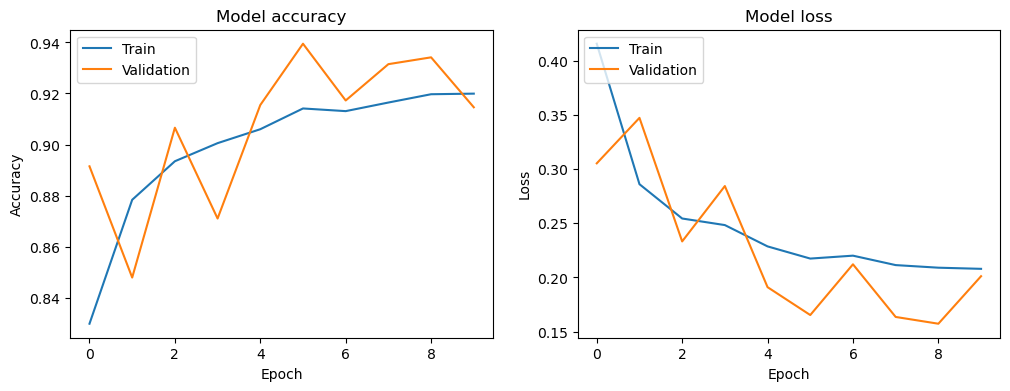

In [33]:
# 11. Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


87/87 [==============================] - 286s 3s/step


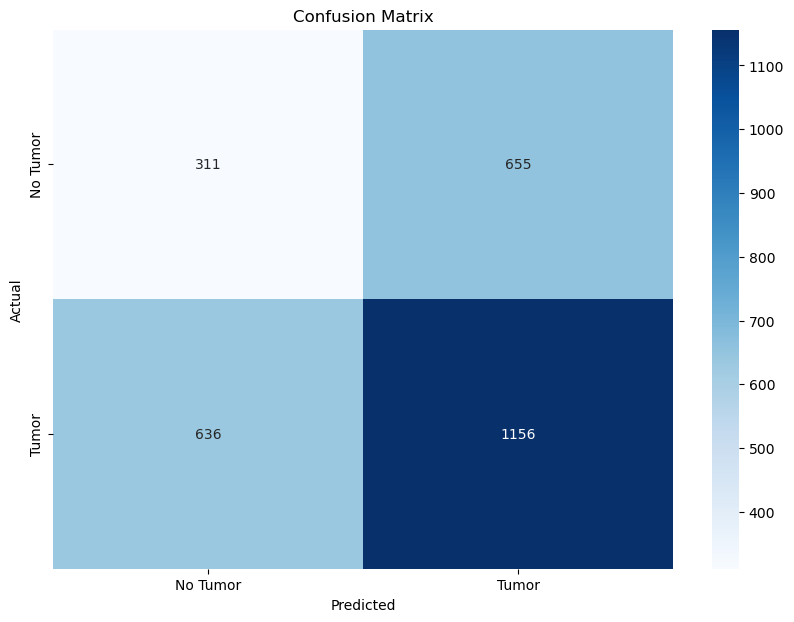

              precision    recall  f1-score   support

    No Tumor       0.33      0.32      0.33       966
       Tumor       0.64      0.65      0.64      1792

    accuracy                           0.53      2758
   macro avg       0.48      0.48      0.48      2758
weighted avg       0.53      0.53      0.53      2758



In [34]:
# 12. Create confusion matrix and classification report
# Get predictions from the model
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).flatten()  # Round and flatten predictions to binary labels

# Get true labels
y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))


In [2]:
#JUST CHECKING DATASET
import os

# Specify the path to your dataset
dataset_path = r"C:\Users\HP\OneDrive\Desktop\FINAL DATASET\Output_folder"

# Function to count images in a given directory
def count_images(folder_path):
    no_tumor_path = os.path.join(folder_path, "No_Tumor")
    yes_tumor_path = os.path.join(folder_path, "Yes_Tumor")

    no_tumor_count = len(os.listdir(no_tumor_path))
    yes_tumor_count = len(os.listdir(yes_tumor_path))

    return no_tumor_count, yes_tumor_count

# Initialize counts
total_no_tumor = 0
total_yes_tumor = 0

# Folders to check
folders = ['train', 'valid', 'test']

# Count images in each folder and sum up for total counts
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    no_tumor_count, yes_tumor_count = count_images(folder_path)

    print(f"Folder: {folder}")
    print(f"  No Tumor images: {no_tumor_count}")
    print(f"  Yes Tumor images: {yes_tumor_count}")

    total_no_tumor += no_tumor_count
    total_yes_tumor += yes_tumor_count

# Print total counts
print(f"Total No Tumor images: {total_no_tumor}")
print(f"Total Yes Tumor images: {total_yes_tumor}")


Folder: train
  No Tumor images: 3179
  Yes Tumor images: 5427
Folder: valid
  No Tumor images: 981
  Yes Tumor images: 143
Folder: test
  No Tumor images: 966
  Yes Tumor images: 1792
Total No Tumor images: 5126
Total Yes Tumor images: 7362


Found 9084 images belonging to 2 classes.
Found 1953 images belonging to 2 classes.
Found 4693 images belonging to 2 classes.
83683744/83683744 [==============================] - 85s 1us/step
Epoch 1/10
284/284 [==============================] - 547s 2s/step - loss: 0.8006 - accuracy: 0.8688 - val_loss: 0.2584 - val_accuracy: 0.9124
Epoch 2/10
284/284 [==============================] - 422s 1s/step - loss: 0.2600 - accuracy: 0.9026 - val_loss: 0.2148 - val_accuracy: 0.9206
Epoch 3/10
284/284 [==============================] - 396s 1s/step - loss: 0.2329 - accuracy: 0.9118 - val_loss: 0.1737 - val_accuracy: 0.9345
Epoch 4/10
284/284 [==============================] - 399s 1s/step - loss: 0.2223 - accuracy: 0.9168 - val_loss: 0.1205 - val_accuracy: 0.9508
Epoch 5/10
284/284 [==============================] - 399s 1s/step - loss: 0.1961 - accuracy: 0.9268 - val_loss: 0.1409 - val_accuracy: 0.9391
Epoch 6/10
284/284 [==============================] - 397s 1s/step - loss: 0.1888 - accuracy:

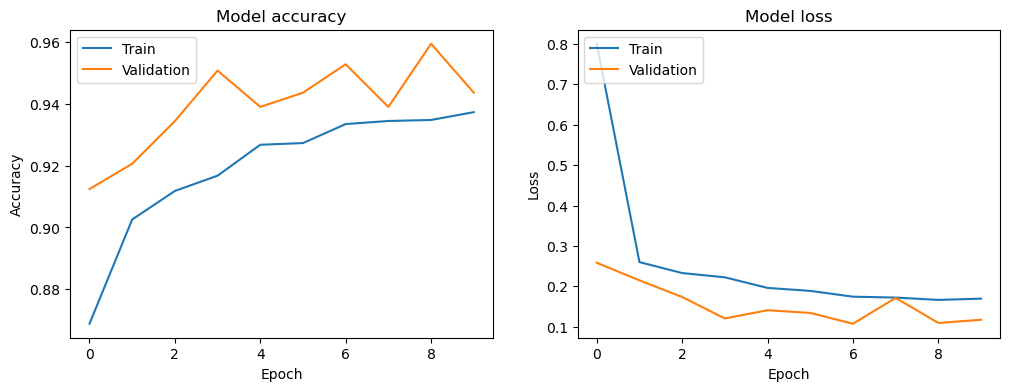

147/147 [==============================] - 149s 1s/step


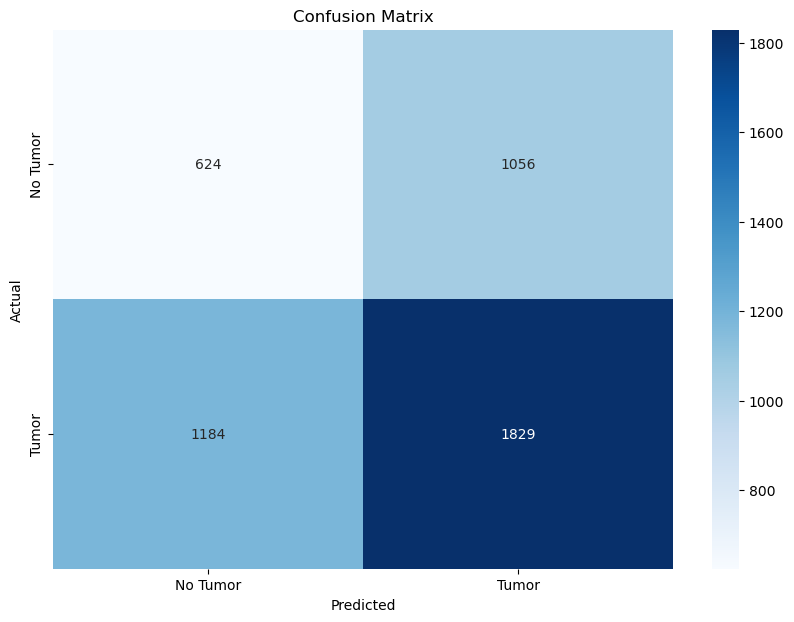

              precision    recall  f1-score   support

    No Tumor       0.35      0.37      0.36      1680
       Tumor       0.63      0.61      0.62      3013

    accuracy                           0.52      4693
   macro avg       0.49      0.49      0.49      4693
weighted avg       0.53      0.52      0.53      4693



In [2]:
#4]Xception model
# 1. Import necessary libraries
import os
import random
from shutil import copy2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Specify paths to your dataset and output folder
dataset_path = r"C:\Users\HP\OneDrive\Desktop\Dataset1"
output_path = r"C:\Users\HP\OneDrive\Desktop\Output_folder"

# 3. Define split counts
split_counts = {
    "train": {"yes_tumor": 4566, "no_tumor": 2450},
    "test": {"yes_tumor": 978, "no_tumor": 525},
    "valid": {"yes_tumor": 978, "no_tumor": 525},
}

# 4. Function to create output folders
def create_folders(output_path, split_names, class_names):
    for split in split_names:
        for class_name in class_names:
            os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

create_folders(output_path, ["train", "test", "valid"], ["Yes_Tumor", "No_Tumor"])

# 5. Function to split the dataset into train, test, and validation sets
def split_dataset(dataset_path, output_path, split_counts):
    for class_name in ["Yes_Tumor", "No_Tumor"]:
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        start_idx = 0
        for split, counts in split_counts.items():
            count = counts[class_name.lower()]
            split_path = os.path.join(output_path, split, class_name)
            for img in images[start_idx : start_idx + count]:
                copy2(os.path.join(class_path, img), os.path.join(split_path, img))
            start_idx += count

split_dataset(dataset_path, output_path, split_counts)

# 6. Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# 7. Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_path, "train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "valid"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "test"),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# 8. Build and compile the model using Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of Xception
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_xception_model.h5', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, checkpoint]
)

# 10. Evaluate the model
model.load_weights('best_xception_model.h5')  # Load the best model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 11. Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# 12. Create confusion matrix and classification report
# Get predictions from the model
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).flatten()  # Round and flatten predictions to binary labels

# Get true labels
y_true = test_generator.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))